## Binary Search Tree

How does a search tree work? What are its properties?

In [44]:
# Toy dataset

towns = {
    0: {'name': 'Romanshorn', 'population': 11556, 'latitude': 47.56586, 'longitude': 9.37869},
    1: {'name': 'Amriswil', 'population': 14313, 'latitude': 47.54814, 'longitude': 9.30327},
    2: {'name': 'Arbon', 'population': 15459, 'latitude': 47.51360, 'longitude': 9.42999},
    3: {'name': 'Weinfelden', 'population': 11893, 'latitude': 47.56638, 'longitude': 9.10588},
    4: {'name': 'Frauenfeld', 'population': 26093, 'latitude': 47.55856, 'longitude': 8.89685},
    5: {'name': 'Kreuzlingen', 'population': 22788, 'latitude': 47.645837,'longitude': 9.178608},
    6: {'name': 'Egnach', 'population': 4897, 'latitude': 47.54565, 'longitude': 9.37864},
}

### BST Nodes
A binary node with two children, a key, and a value (payload).

In [45]:
class BstNode():
    """Invariant: All keys in left subtree are <= key, all keys in right subtree are >= key."""
    def __init__(self, key, value):
        self.left = None
        self.right = None
        self.key = key
        self.value = value

In [46]:
# Lets sort the tuples
sorted_by_population = []
for id,town in towns.items():
    tuple_population_id = (town['population'], id)
    sorted_by_population.append(tuple_population_id)


sorted_by_population.sort()
sorted_by_population

[(4897, 6),
 (11556, 0),
 (11893, 3),
 (14313, 1),
 (15459, 2),
 (22788, 5),
 (26093, 4)]

### Building a Tree

Use the list of elements sorted by the search dimension - always use the median of the remaining list as the next node. Build the tree recursively.

In [47]:
def build_bst(sorted_tuples, lower, upper):
    """Include all elements in sorted_tuples from lower to upper indices (inclusive)."""
    if lower > upper:
        return None
    median_index = (lower + upper) // 2
    median_element = sorted_tuples[median_index]
    node = BstNode(median_element[0], median_element[1])
    node.left = build_bst(sorted_tuples, lower, median_index - 1)
    node.right = build_bst(sorted_tuples, median_index + 1, upper)
    return node

tree = build_bst(sorted_by_population, 0, len(sorted_by_population)-1)

### Tree Traversal
Let's walk the tree in-order:

In [51]:
def walk_tree(tree):
    if tree is None:
        return
    yield from walk_tree(tree.left)
    yield tree
    yield from walk_tree(tree.right)

for node in walk_tree(tree): print(node.key, node.value, towns[node.value]['name'])

4897 6 Egnach
11556 0 Romanshorn
11893 3 Weinfelden
14313 1 Amriswil
15459 2 Arbon
22788 5 Kreuzlingen
26093 4 Frauenfeld


### Visualize

Let's use graphviz to render a visualization of the tree.

Note: you may need to restart the kernel to use updated packages.


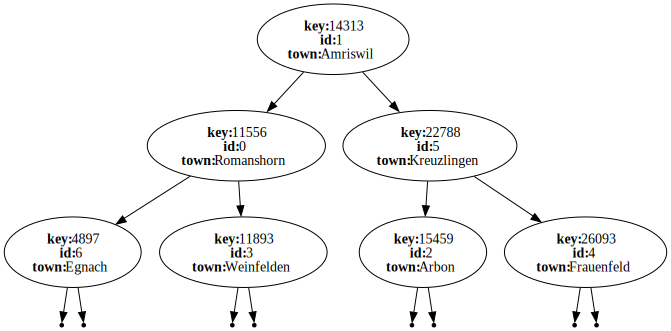

In [50]:
%pip install graphviz
import graphviz

def render_tree(graph, node, nuller=""):
    """Renders the tree in graphviz."""
    if node is None:
        # In order to have separate Nil-nodes, we need to create artificially
        # named nodes with unique names. We use the 'nuller' paramter to create
        # these, which is the left/right-path down from the root.
        graph.node(nuller, "", shape="point")
        return nuller
    
    id = str(node.key)
    graph.node(id, f"< <B>key:</B> {id}<BR/><B>id:</B> {str(node.value)}<BR/><B>town:</B> {towns[node.value]['name']} >")
    left_key = render_tree(graph, node.left, nuller + "l")
    graph.edge(id, left_key)
    right_key = render_tree(graph, node.right, nuller + "r")
    graph.edge(id, right_key)
    return id

dot = graphviz.Digraph("Population Search Tree")
render_tree(dot, tree)
dot